Name Bentao Li

Labpartner(s)

In [3]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

**For today's lab you need to install the package cartopy**

In [3]:
# you can install packages here in a notebook with pip or conda, 
# or in the anaconda navigator in the environments tab (reccommended)

# pip install cartopy
# conda install cartopy

In [21]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 6.2

Today we will finish fiunction sharing and do more plotting

# Warmups 6.2

**W.1** (From Zach) Write some code that generates 15 random integers from 1-100. If the integers are divisible by 2 assign them to list "x" if they are divisible by three, assign them to list "y", if they are neither assign them to list "z". 

In [13]:

random_list = [np.random.randint(1, 100) for _ in range(15)]
random_list
x, y, z = [], [], []
for num in random_list:
    if num % 6 == 0:
        x.append(num)
        y.append(num)
    elif num % 2 == 0:
        x.append(num)
    elif num % 3 == 0:
        y.append(num)
    else:
        z.append(num)

print(x,y,z)

[34, 96, 34, 34, 94, 90] [96, 45, 81, 3, 90, 63] [23, 89, 55, 71, 97]


**W.2** Plot your lists together in some sensible way. Zach suggests a histogram with different colors for each list

(array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1.]),
 array([23. , 30.4, 37.8, 45.2, 52.6, 60. , 67.4, 74.8, 82.2, 89.6, 97. ]),
 <BarContainer object of 10 artists>)

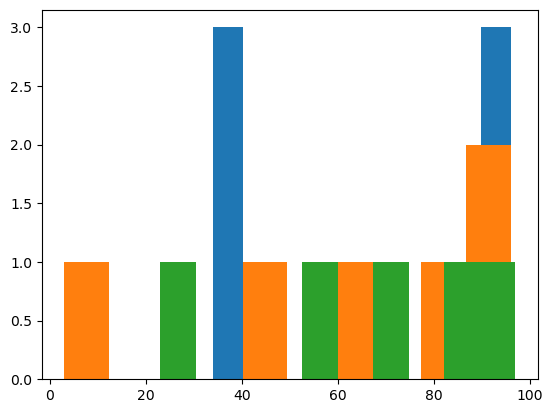

In [17]:
plt.hist(x)
plt.hist(y)
plt.hist(z)

# Lecture 6.2

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - continued

### Questions

### Cartopy

Let's take the data we used last time and make the plot publication ready

There are a number of differnt map projections available in Cartopy.  https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

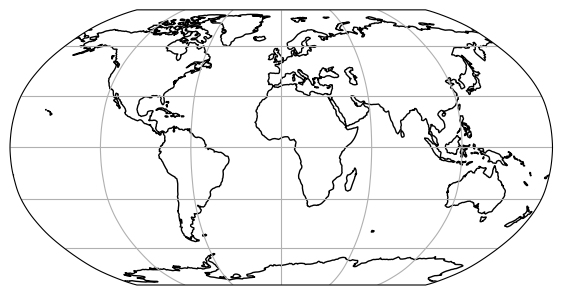

In [23]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

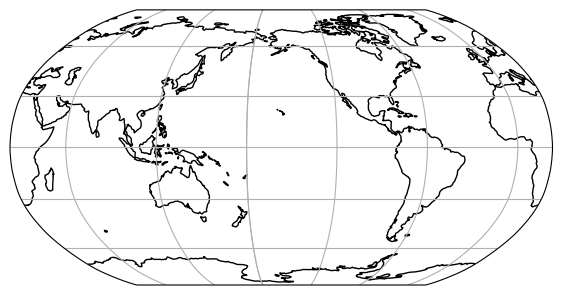

In [24]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the map to 203 degrees East
ax.coastlines(resolution='110m')
ax.gridlines()

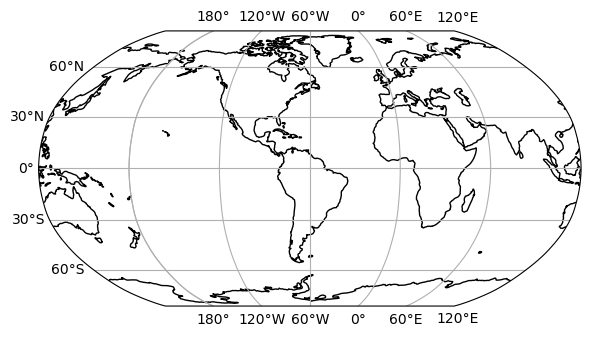

In [25]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = -60))
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

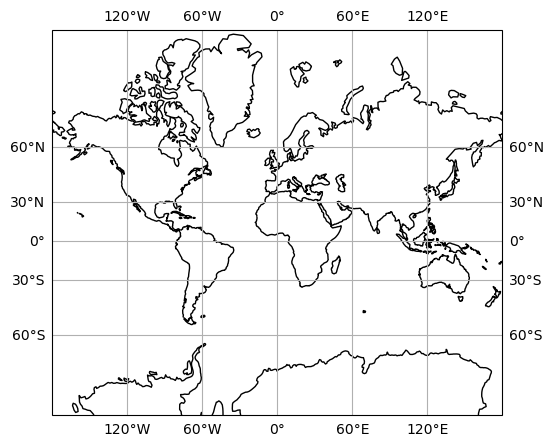

In [26]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

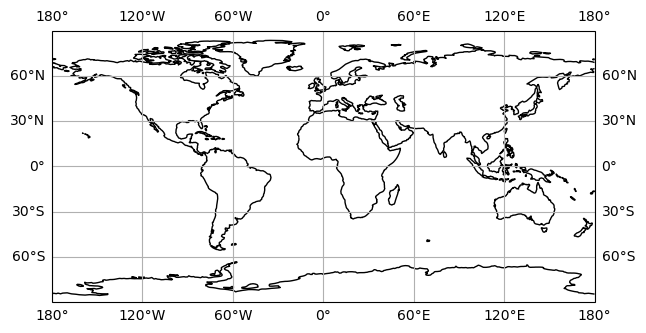

In [27]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

# -60 (60 W) is the same as 300 E (360 degrees in total 360-60W = 300E)

How do I zoom in?

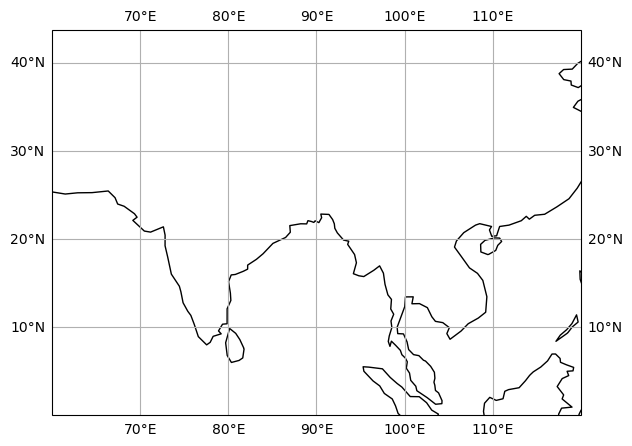

In [29]:
# let's zoom in to S Asia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([60, 120, 0, 40]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)


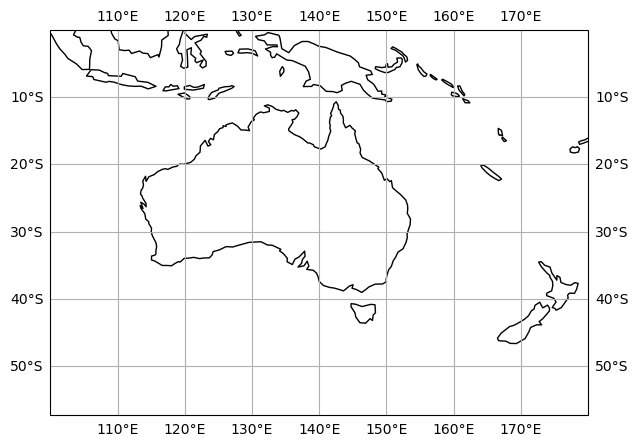

In [30]:
# make a plot of Australia

plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([100, 180, 0, -50]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)



#### Moving back to the Gulf of Mexico, we want to set the lat and lon range to match our HYCOM data. How do we find this?

In [39]:
#insert path or url to file here
# download from the internet
link = "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"

In [41]:
gom_data = xr.open_dataset(link, decode_times=False)

In [42]:
gom_data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
  * MT                     (MT) float64 3.653e+04
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
Data variables:
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM-TSIS
    institution:                     COAPS-FSU
    source:                          HYCOM archive file
    experiment:                      01.6
    comment:                         p-grid
    history:                         Fri Feb 11 20:08:27 2022: ncks -A -v wnd...
    history_of_appended_files:       Fri Feb 11 20:08:27 2022: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

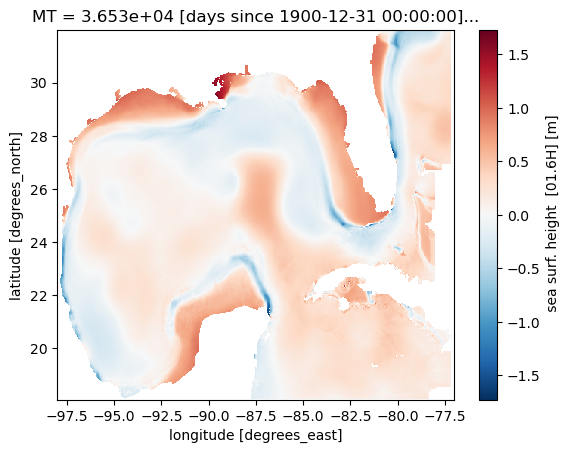

In [43]:
# let's remember what our data looked like, pick a variable to plot

gom_data.ssh.plot()

In [46]:
lat_min = gom_data.Latitude.min()
print(lat_min)

<xarray.DataArray 'Latitude' ()>
array(18.0916481)


In [49]:
lat_max = gom_data.Latitude.max()
print(lat_max)

<xarray.DataArray 'Latitude' ()>
array(31.96064758)


In [51]:
lon_min = gom_data.Longitude.min()
print(lon_min)

<xarray.DataArray 'Longitude' ()>
array(-98.)


In [53]:
lon_max = gom_data.Longitude.max()
print(lon_max)

<xarray.DataArray 'Longitude' ()>
array(-77.04000092)


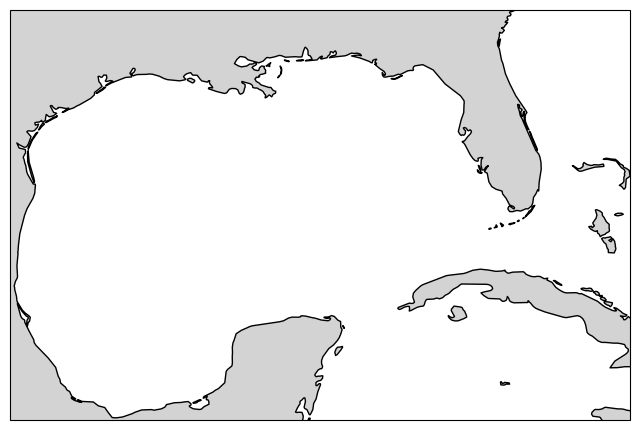

In [55]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 
# note the seqence of arguments for set_extent: x1, x2, y1, y2

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
# you can use named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# or with other methods: https://matplotlib.org/stable/users/explain/colors/colors.html

ax.add_feature(land_50m)

#### Let's make the land color a bit lighter gray

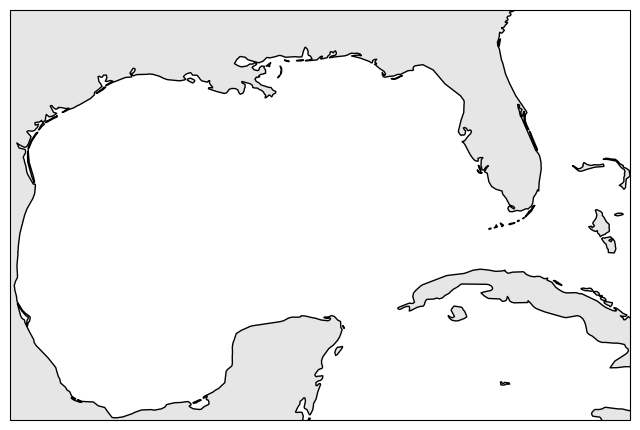

In [58]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 
# note the seqence of arguments for set_extent: x1, x2, y1, y2

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9') # 0 is black and 1 is white
# you can use named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# or with other methods: https://matplotlib.org/stable/users/explain/colors/colors.html

ax.add_feature(land_50m)

#### Now let's add some data

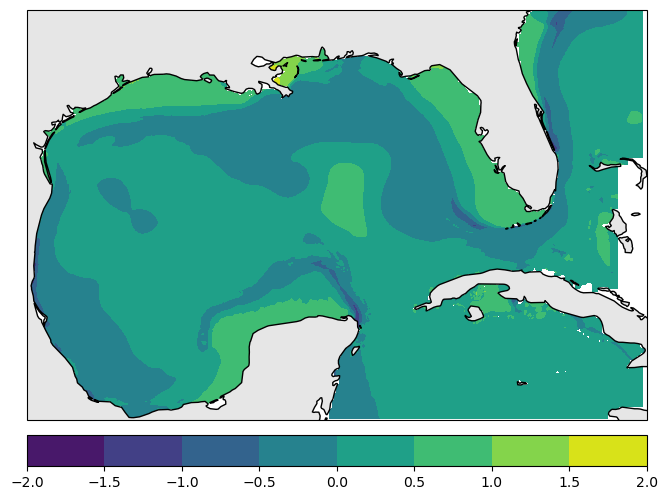

In [61]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 

# Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

# Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# Creates colorbar based on the contour. This allows us to get a quick look at our data range 
# before we start formatting the figure 
cbar = plt.colorbar(p, orientation='horizontal', pad=0.02)


#### Try taking out the options for the colorbar, what happens? What does "pad" do?

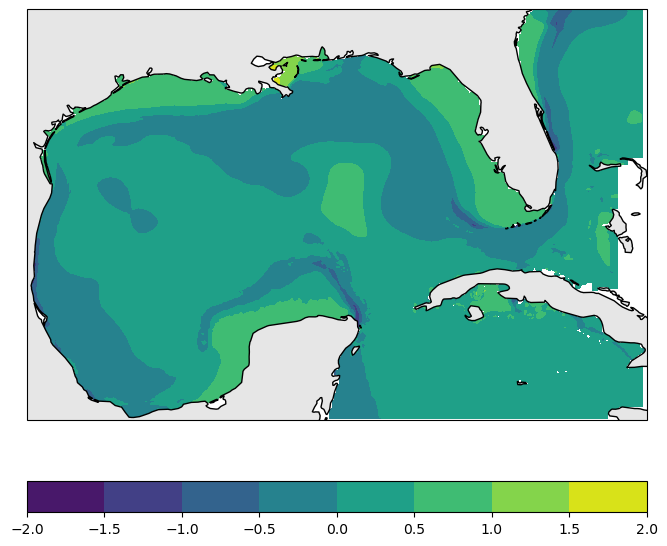

In [66]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [lon_min, lon_max, lat_min, lat_max]) 

# Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

# Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# Creates colorbar based on the contour. This allows us to get a quick look at our data range 
# before we start formatting the figure 
cbar = plt.colorbar(p, orientation='horizontal', pad=0.08)

#### What is the range of our data?

In [64]:
var.max()

<xarray.DataArray 'ssh' ()>
array(-1.72738123)
Coordinates:
    MT       float64 3.653e+04
    Date     float64 ...

In [51]:
var.min()

<xarray.DataArray 'ssh' ()>
array(-1.72738123)
Coordinates:
    MT       float64 3.653e+04
    Date     float64 ...

#### Let's set the countour levels to match our data range. I'm also going to change the colormap
See https://matplotlib.org/stable/users/explain/colors/colormaps.html
Note you can reverse any colormap by appending '_r' to the name

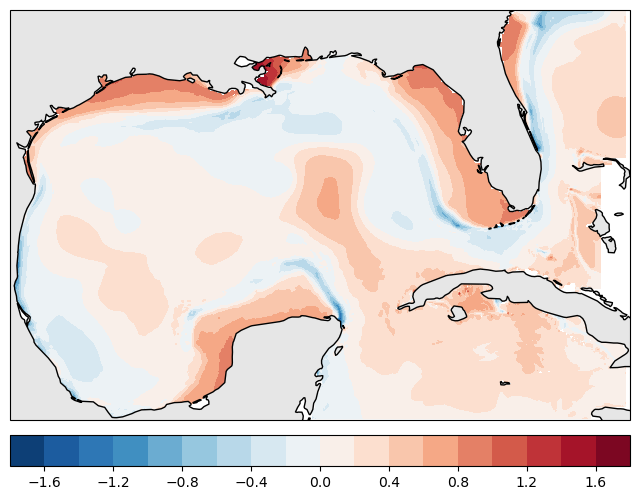

In [53]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

# looks like all the data is between around -1.8 to 1.6, let's set the contourlevels to this, centered at zero
# I'm also going to use a diverging colormap centered at zero
step = np.arange(-1.8,1.9,0.2)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) # projection is needed in every plot call

cbar = plt.colorbar(p, orientation='horizontal', pad=0.02)


#### Okay, now let's add some labels

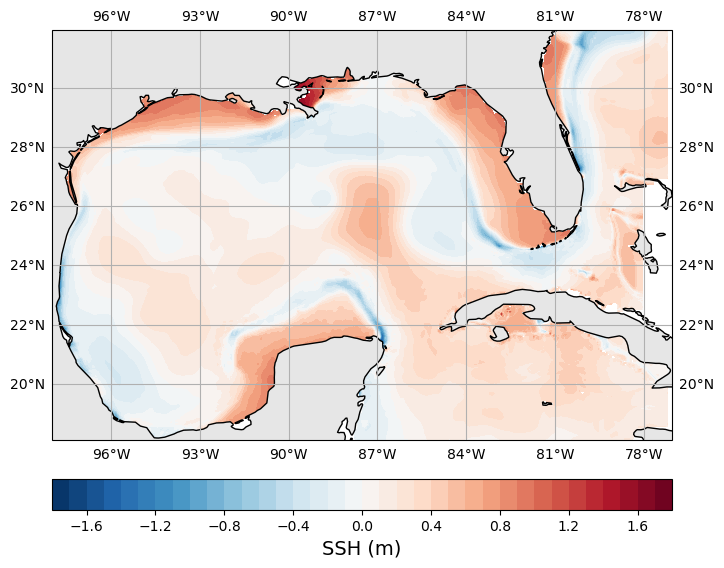

In [56]:
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-60)))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) 
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05)
cbar.set_label("SSH" +' (m)', size = 14)

ax.gridlines(draw_labels=True)


#### These labels are too small for what I want. I need them to be much bigger.

In [59]:
#Note we can easily make the lat/lon and colorbar font size bigger by adjusting the matplotlib parameters
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

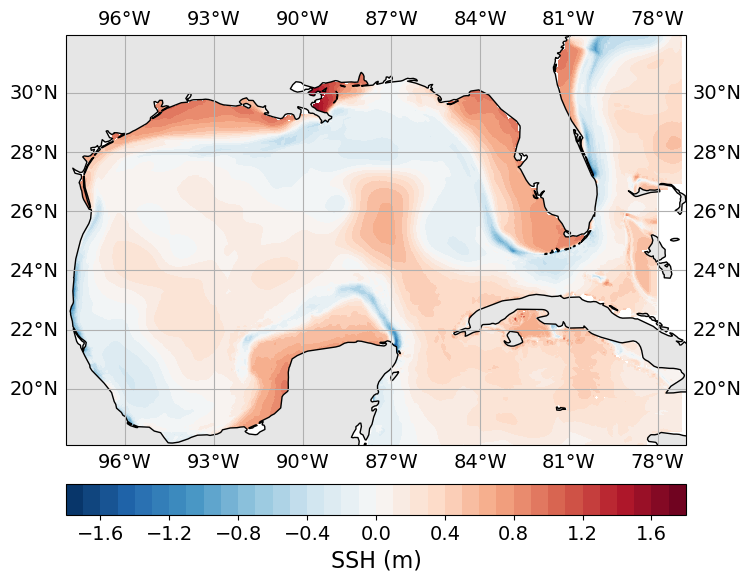

In [60]:
#exact same code as before

fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-60)))
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) 
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05)
cbar.set_label("SSH" +' (m)', size = 16)

ax.gridlines(draw_labels=True)


#### Now let's explore how to do this all manually so we have total control

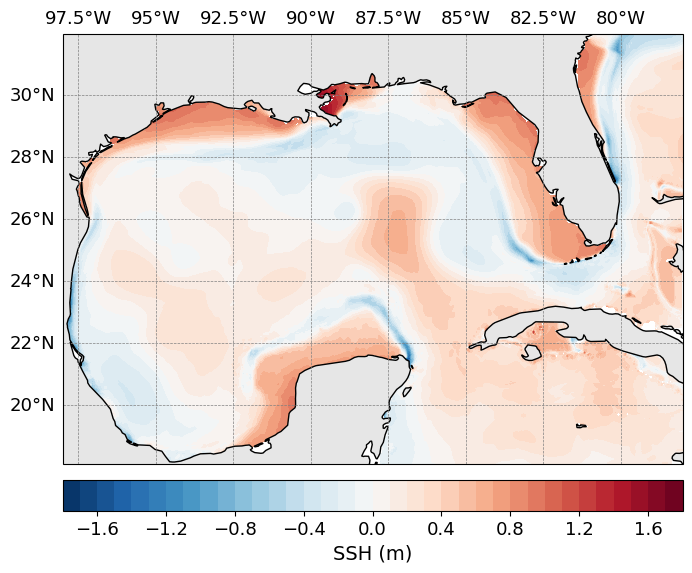

In [65]:
# OR we can use the formatter package to modify the lat/lon labels directly
# note this doesn't change the colorbar tick label fontsize, we have to add a line for that after the colorbar code

# I'm also going to cut out the white bits at right by adjusting lon_max
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, -78, lat_min, lat_max]) 

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='0.9')
ax.add_feature(land_50m)

x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

step = np.arange(-1.8,1.9,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', 
                    levels = step) 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.02) # move the colorbar up closer since we moved the longitude to top
cbar.set_label("SSH" +' (m)', size = 14)
# adjust the colorbar font size:
cbar.ax.tick_params(labelsize=13)

#ax.gridlines()

# Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
#     #and sets the grid lines on the graph
# Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = True    
gl.left_labels = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 13}
gl.ylabel_style = {'size' : 13}

#### Not bad

## Lab 6.2

**E.0** Finish Lab 6.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4. Let me know if this feels like a good pace

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

**E.3** Make a plot of a different variable for the HYCOM data. Play around with colormaps and contourlines to make it your own. Post your plot on the class slack #random channel

### This week's project:

#### Note you might want to restart your kernel at this point to dump all the hycom data from memory. Just reload the packages you need

**E.4** Download some data from the ISIMIP data archive (https://data.isimip.org/) and plot it using cartopy. ISIMIP provides bias-corrected daata for past and future climate simulations used for impacts studies world wide. Let's start with some maximum atmospheric surface temperature data in the historical period (1850-2014 for CMIP6). We want climate forcing data for ISIMIP3b, which are the lastest (CMIP6) climate projections. 

* https://data.isimip.org/search/tree/ISIMIP3b/InputData/climate/
* Click atmopsheric forcing
* Click GFDL... This is one of NOAA-GFDL's climate models (ESM4)
* Click historical

All of the variable names are in CMIP lingo. Sadly, there is no easy cheat sheet. But you want tas, which is "temperature of air at surface". Let's use the tasmax, the maximum daily surface air temperature
* Click tasmax
* Click files to see all the available files.
  
Here you have a choice, you can download an etire file (note the size) or you can use the "configure download" button, which has subsetting by space or country, as well as time opitons. You can click on a file name to see more info.
* Click on "download file" for the 1851-1860 file. Just grab the whole file, it will take a minute to download.
* Load up the data into xarray and plot the maximum of this dataset (so max over the decade for each gridcell. You just use a max function for this, no loops needed).
* Plot using cartopy to make it pretty. Put some sensible lables on it, etc. Maybe add some country boundaries.

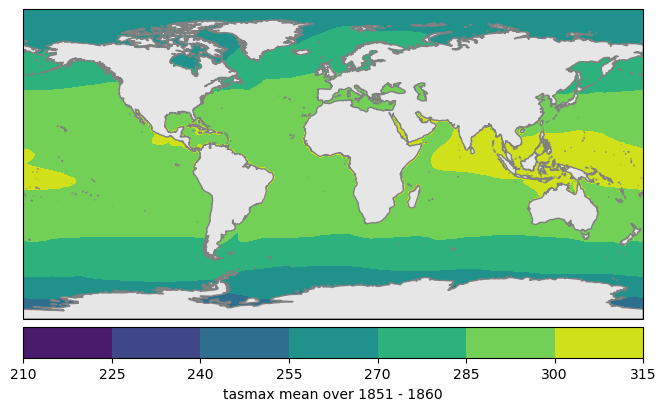

In [82]:
tasmax_data = xr.open_dataset('C:/OCS/4001/gfdl-esm4_r1i1p1f1_w5e5_historical_tasmax_global_daily_1851_1860.nc', decode_times=False)
#print(tasmax_data)
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [-180, 180, -90, 90]) 

# Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='grey',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = tasmax_data.lon
y = tasmax_data.lat
var_mean =  tasmax_data.tasmax.mean(dim='time')

# Contours the data on tho the map projection
p = ax.contourf(x, y,var_mean, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# Creates colorbar based on the contour. This allows us to get a quick look at our data range 
# before we start formatting the figure 
cbar = plt.colorbar(p, orientation='horizontal', pad=0.01, label='tasmax mean over 1851 - 1860')
plt.show()

**E.5** Now make a second plot using ISIMP data for a future climate projection. Following the same steps as above, get the GFDL tasmax data for the future climate scenario SSP3-7.0 (higher emissions scenario) for 2051-2060. Again, calculate the maximum at each gridpoint for this data set. This is the future maximum daily temperature for that decade. Make your plot nice.

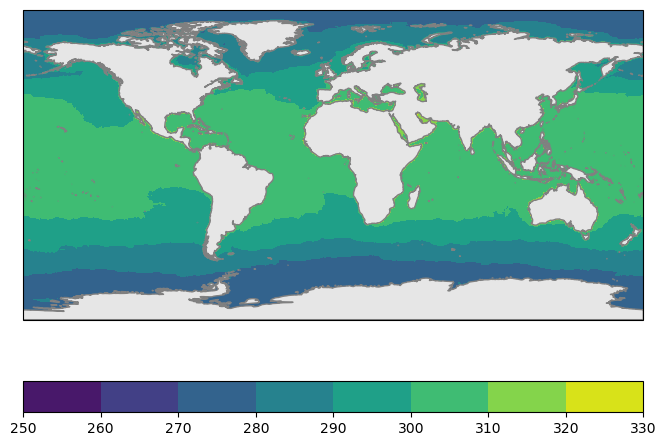

In [87]:
tasmax_data = xr.open_dataset('C:/OCS/4001/gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmax_global_daily_2051_2060.nc', decode_times=False)
#print(tasmax_data)
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [-180, 180, -90, 90]) 

# Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='grey',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = tasmax_data.lon
y = tasmax_data.lat
var_max =  tasmax_data.tasmax.max(dim='time')

# Contours the data on tho the map projection
p = ax.contourf(x, y,var_max, transform=ccrs.PlateCarree(), cmap='viridis') # projection is needed in every plot call

# Creates colorbar based on the contour. This allows us to get a quick look at our data range 
# before we start formatting the figure 
cbar = plt.colorbar(p, orientation='horizontal', pad=0.08)
plt.show()

**E.6** Now plot the anomaly between the two, 2050's - 1850's. Use a diverging colormap (light in the middle), centered on zero. What is the outlook for your country of orgin? Answer in full sentances with specific numbers.

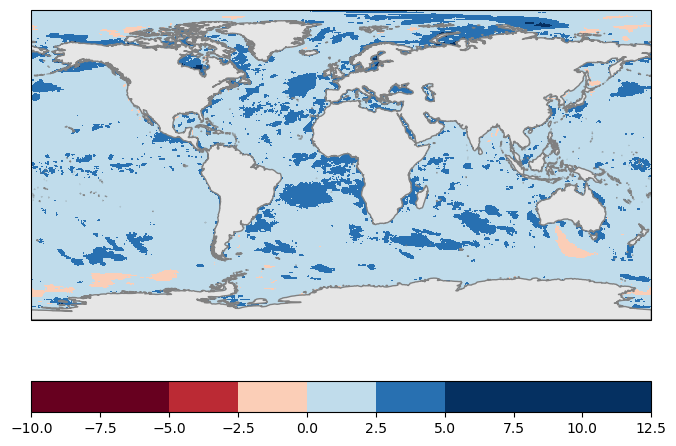

In [90]:
tasmax_hist = xr.open_dataset('C:/OCS/4001/gfdl-esm4_r1i1p1f1_w5e5_historical_tasmax_global_daily_1851_1860.nc', decode_times=False)
tasmax_futu = xr.open_dataset('C:/OCS/4001/gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmax_global_daily_2051_2060.nc', decode_times=False)
#print(tasmax_data)
fig,ax= plt.subplots(figsize =(8,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent( [-180, 180, -90, 90]) 

# Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='grey',
                                    facecolor='0.9')
ax.add_feature(land_50m)

# let's fill in the following:
x = tasmax_hist.lon
y = tasmax_hist.lat
tasmax_hist_max =  tasmax_hist.tasmax.max(dim='time')
tasmax_futu_max = tasmax_futu.tasmax.max(dim='time')

# Contours the data on tho the map projection
p = ax.contourf(x, y,tasmax_futu_max - tasmax_hist_max, transform=ccrs.PlateCarree(), cmap='RdBu', vmin=-10, vmax=10) # projection is needed in every plot call

# Creates colorbar based on the contour. This allows us to get a quick look at our data range 
# before we start formatting the figure 
cbar = plt.colorbar(p, orientation='horizontal', pad=0.08)
plt.show()

**E.7** How could you potentially use this kind of data (future climate projections) in your research? Do some brainstorming. Write down your thoughts here.

In [ ]:
The difference in future scenarios and historical climate could be used to analyze the hotspot or most vulnerable regions towards climate change. I